# Proyek Analisis Data: Bike_Share
- **Nama:** Muhammad Wahyu Prastyo
- **Email:** 111202214407@mhs.dinus.ac.id
- **ID Dicoding:** MC007D5Y0815

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca dan musim (Spring, Summer, Fall, Winter) terhadap jumlah penyewaan sepeda?
- Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan hari libur, khususnya pada jam-jam Tertentu?

## Import Semua Packages/Library yang Digunakan

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [266]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [267]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kita bisa Melihat Dari Kdua Data yang Ada

### Assessing Data

In [268]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [269]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [270]:
# Cek jumlah duplikasi pada data day
print("\nJumlah baris duplikat:", df_day.duplicated().sum())


Jumlah baris duplikat: 0


In [271]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [272]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [273]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Pada Kdua data yang ada Tidak ada Missing Values

In [274]:
# Cek jumlah duplikasi pada data day
print("\nJumlah baris duplikat:", df_hour.duplicated().sum())


Jumlah baris duplikat: 0


In [275]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [276]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [277]:
# Tambah Kolom nama Hari
df_day["day_of_week"] = df_day["dteday"].dt.day_name()
df_hour["day_of_week"] = df_hour["dteday"].dt.day_name()

# Tambah Kolom Nama Musim Karena season di sini belum Jelas
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df_day["season_name"] = df_day["season"].map(season_mapping)
df_hour["season_name"] = df_hour["season"].map(season_mapping)

# Mapping hari kerja
day_map = {0: "Hari Libur", 1: "Hari Kerja"}
df_day['workingday'] = df_day['workingday'].map(day_map)


**Insight:**
- Mengubah Typedata Kolom dtday & Check Apakah Ada Duplicates Atau tidak
- Menambah Kolom Baru untuk Analisis

## Exploratory Data Analysis (EDA)

### Day

In [278]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,season_name
649,650,2012-10-11,4,1,10,0,4,Hari Kerja,1,0.435000,0.431167,0.463333,0.181596,834,6736,7570,Thursday,Winter
92,93,2011-04-03,2,0,4,0,0,Hari Libur,1,0.378333,0.378767,0.480000,0.182213,1651,1598,3249,Sunday,Summer
300,301,2011-10-28,4,0,10,0,5,Hari Kerja,2,0.330833,0.318812,0.585833,0.229479,456,3291,3747,Friday,Winter
506,507,2012-05-21,2,1,5,0,1,Hari Kerja,2,0.598333,0.565667,0.811250,0.233204,630,3729,4359,Monday,Summer
508,509,2012-05-23,2,1,5,0,3,Hari Kerja,2,0.621667,0.584612,0.774583,0.102000,766,4494,5260,Wednesday,Summer


In [279]:
df_day.describe(include = "all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,season_name
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hari Kerja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,Fall
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,188
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,NaN,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,NaN,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,NaN,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [280]:
df_day.instant.is_unique

True

### Hour

In [281]:
df_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,season_name
6330,6331,2011-09-26,4,0,9,8,0,1,1,2,0.62,0.5455,0.94,0.0000,29,326,355,Monday,Winter
10868,10869,2012-04-03,2,1,4,0,0,2,1,1,0.40,0.4091,0.43,0.1343,1,32,33,Tuesday,Summer
1289,1290,2011-02-26,1,0,2,21,0,6,0,1,0.28,0.2727,0.65,0.2537,9,59,68,Saturday,Spring
2792,2793,2011-05-01,2,0,5,6,0,0,0,2,0.40,0.4091,0.82,0.0896,4,9,13,Sunday,Summer
7304,7305,2011-11-05,4,0,11,23,0,6,0,1,0.28,0.3182,0.70,0.0000,4,81,85,Saturday,Winter


In [282]:
df_hour.describe(include = "all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,season_name
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,Fall
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2512,4496
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [283]:
df_day.instant.is_unique

True

### Explore Data Berdasarkan Pengaruh Jam & Musim


#### Musim

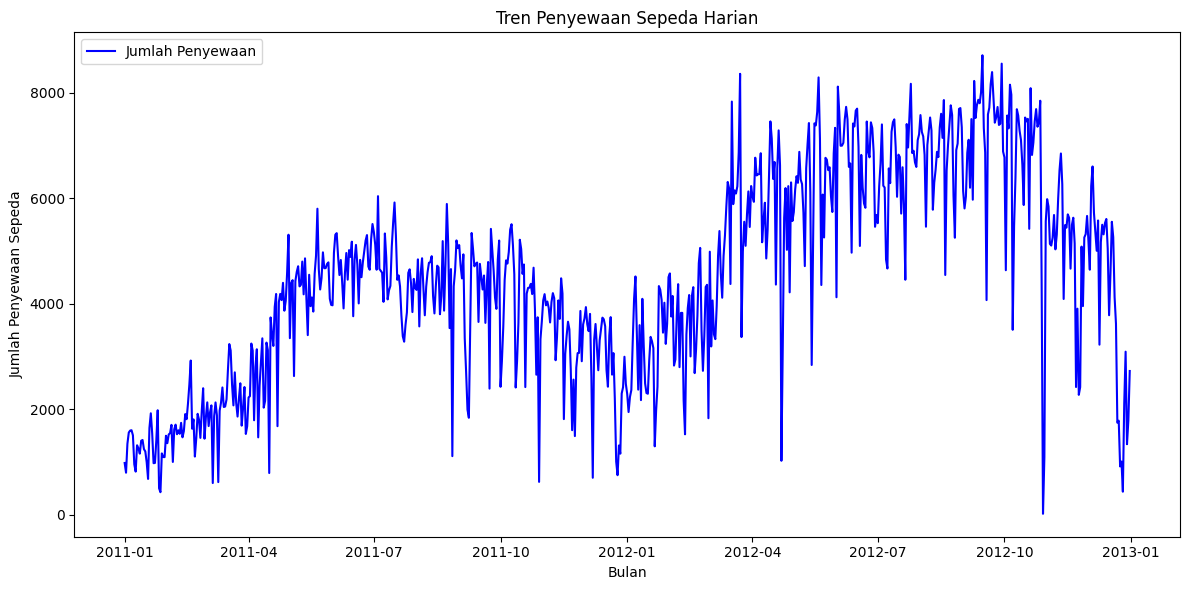

In [284]:
# Histori Penyewaan Harian
plt.figure(figsize=(12, 6))
plt.plot(df_day['dteday'], df_day['cnt'], label='Jumlah Penyewaan', color='blue')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda Harian")
plt.legend()
plt.tight_layout()
plt.show()

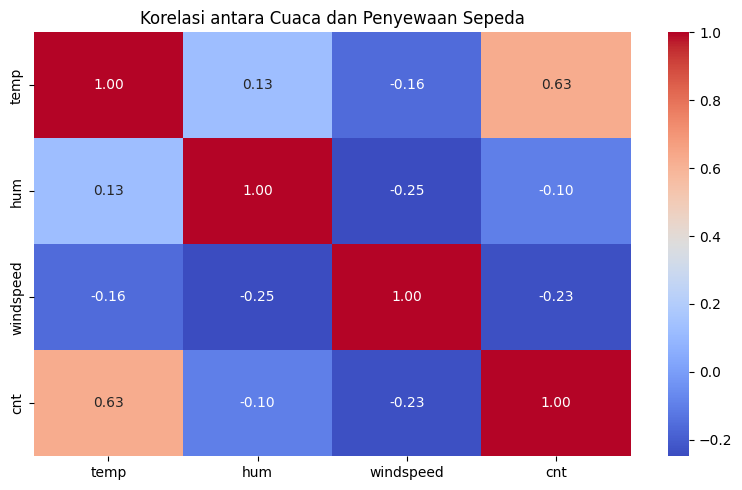

In [285]:
# korelasi antara variabel cuaca (temp, hum, windspeed) dan penyewaan (cnt)
plt.figure(figsize=(8, 5))
corr_data = df_day[['temp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara Cuaca dan Penyewaan Sepeda")
plt.tight_layout()
plt.show()

In [286]:
# Hitung rata-rata penyewaan per musim
season_avg = df_day.groupby("season_name")["cnt"].mean().sort_values()
print("Rata-rata penyewaan sepeda per musim:")
print(season_avg)

Rata-rata penyewaan sepeda per musim:
season_name
Spring    2604.132597
Winter    4728.162921
Summer    4992.331522
Fall      5644.303191
Name: cnt, dtype: float64


**Insight:**
- Tren Penyewaan Sepeda Harian
Polanya Fluktuatif: Grafik line penyewaan sepeda menunjukkan fluktuasi yang jelas dari hari ke hari. Terdapat puncak penyewaan di hari-hari tertentu dan penurunan di hari lainnya.
Pola Musiman: Dari tren keseluruhan, terlihat adanya pola musiman di mana penyewaan cenderung berbeda pada musim yang berbeda.
- Heatmap korelasi menunjukkan bahwa variabel temp (suhu) cenderung memiliki korelasi positif dengan jumlah penyewaan (cnt). Artinya, semakin tinggi suhu, cenderung semakin banyak sepeda yang disewa.
- Untuk membuktikan bahwa Musim sangat berpengaruh pada penyewaan sepeda silahkan bisa dilihat pada Rata - Rata penyewaan sepeda per musim yang dimana dijelaskan bahwa Summer Lebih banyak penyewa Sepdea.



#### Jam & Hari Libur

In [287]:
# Hitung rata-rata penyewaan per jam
avg_by_hour = df_hour.groupby('hr')['cnt'].mean().reset_index()
print ("Rata-rata penyewaan sepeda per jam:")
print(avg_by_hour)

Rata-rata penyewaan sepeda per jam:
    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


<ipython-input-288-902b5776dde8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=avg_by_hour, palette="viridis")


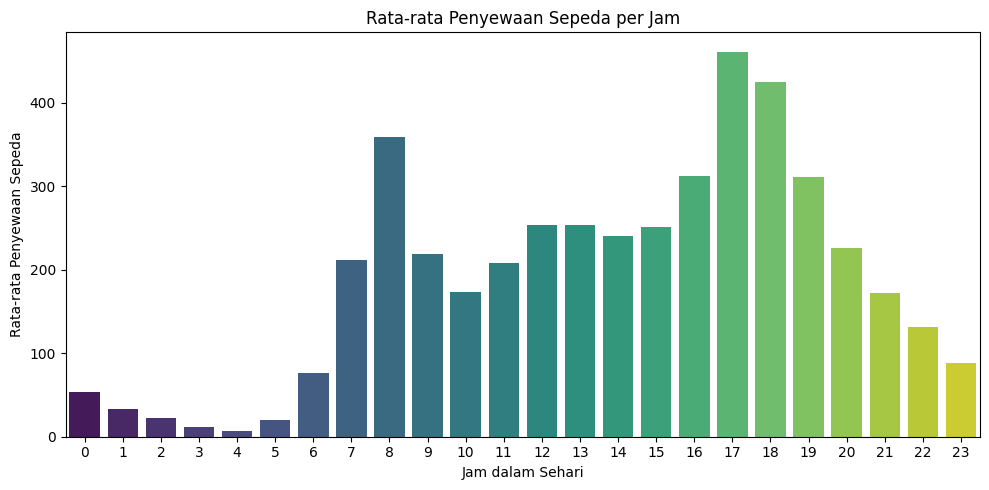

In [288]:
# Visualisasi Penyewaan Per Jam
plt.figure(figsize=(10, 5))
sns.barplot(x='hr', y='cnt', data=avg_by_hour, palette="viridis")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.tight_layout()
plt.show()

In [289]:
# Hitung rata-rata penyewaan per jam berdasarkan kategori hari kerja vs. libur
avg_by_hour_working = df_hour.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()
print("Rata-rata penyewaan sepeda per jam berdasarkan kategori hari kerja vs. libur:")
print(avg_by_hour_working)

Rata-rata penyewaan sepeda per jam berdasarkan kategori hari kerja vs. libur:
    hr  workingday         cnt
0    0           0   90.800000
1    0           1   36.786290
2    1           0   69.508696
3    1           1   16.552632
4    2           0   53.171053
5    2           1    8.683778
6    3           0   25.775330
7    3           1    4.942553
8    4           0    8.264317
9    4           1    5.429787
10   5           0    8.689189
11   5           1   24.913131
12   6           0   18.742358
13   6           1  102.500000
14   7           0   43.406926
15   7           1  290.612903
16   8           0  105.653680
17   8           1  477.006048
18   9           0  171.623377
19   9           1  241.518145
20  10           0  255.909091
21  10           1  135.366935
22  11           0  315.316017
23  11           1  158.229839
24  12           0  366.259740
25  12           1  200.820926
26  13           0  372.731602
27  13           1  198.429719
28  14           0  364

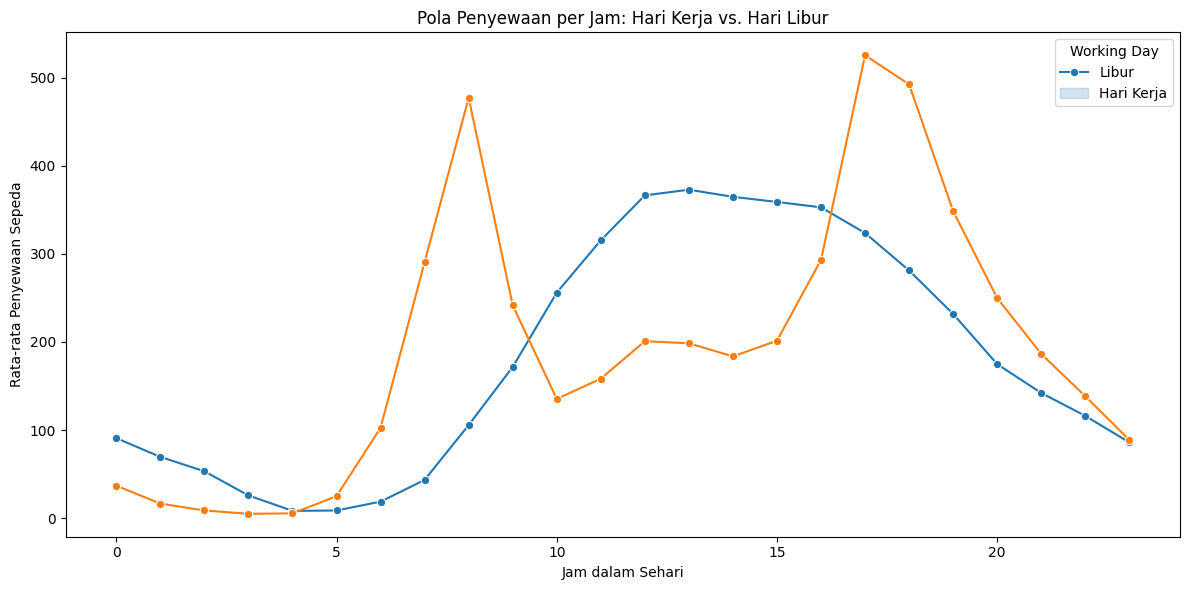

In [290]:
# Visualisasi penyewaan per jam berdasarkan kategori hari kerja vs. libur
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=avg_by_hour_working, marker='o')
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pola Penyewaan per Jam: Hari Kerja vs. Hari Libur")
plt.legend(title='Working Day', labels=['Libur', 'Hari Kerja'])
plt.tight_layout()
plt.show()

In [291]:
# Hitung rata-rata penyewaan per jam untuk tiap hari dalam minggu
avg_by_hour_weekday = df_hour.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()
print("Rata-rata penyewaan sepeda per jam untuk tiap hari dalam minggu:")
print(avg_by_hour_weekday)

Rata-rata penyewaan sepeda per jam untuk tiap hari dalam minggu:
     weekday  hr         cnt
0          0   0   93.990385
1          0   1   77.432692
2          0   2   61.627451
3          0   3   31.144231
4          0   4    9.362745
..       ...  ..         ...
163        6  19  239.932692
164        6  20  180.865385
165        6  21  156.000000
166        6  22  139.663462
167        6  23  115.855769

[168 rows x 3 columns]


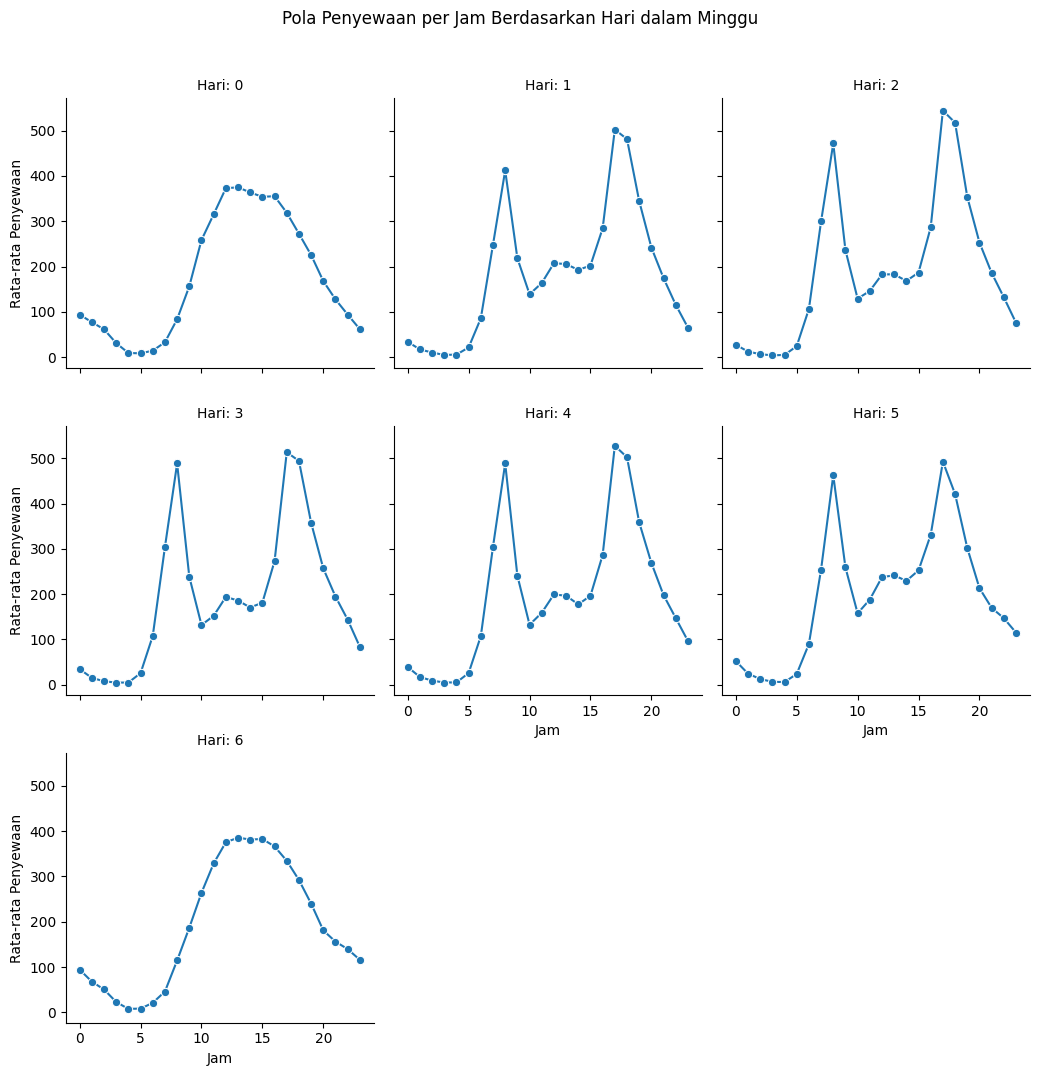

In [292]:
# Visualisasi dengan untuk melihat tiap hari secara terpisah
g = sns.FacetGrid(avg_by_hour_weekday, col='weekday', col_wrap=3, height=3.5)
g.map(sns.lineplot, 'hr', 'cnt', marker='o')
g.set_titles("Hari: {col_name}")
g.set_axis_labels("Jam", "Rata-rata Penyewaan")
plt.suptitle("Pola Penyewaan per Jam Berdasarkan Hari dalam Minggu", y=1.02)
plt.tight_layout()
plt.show()

In [293]:
# Agregasi data hourly menjadi data harian
hour_agg = df_hour.groupby('dteday').agg({
    'cnt': 'sum',         # total penyewaan per hari dari data per jam
    'temp': 'mean',       # rata-rata suhu harian
    'hum': 'mean',        # rata-rata kelembaban harian
    'windspeed': 'mean'   # rata-rata kecepatan angin harian
}).reset_index()

# Rename kolom hasil agregasi agar lebih jelas
hour_agg.rename(columns={
    'cnt': 'cnt_hour_sum',
    'temp': 'temp_hour_avg',
    'hum': 'hum_hour_avg',
    'windspeed': 'windspeed_hour_avg'
}, inplace=True)

# Merge data harian dari day.csv dengan hasil agregasi dari hour.csv
merged_daily = df_day.merge(hour_agg, on='dteday', how='left')

# Simpan hasil merge sebagai file CSV
merged_daily.to_csv("all_data.csv", index=False)

print("Data merged (aggregasi harian) berhasil disimpan sebagai 'all_data.csv'")


Data merged (aggregasi harian) berhasil disimpan sebagai 'all_data.csv'


**Insight:**
- Pola Penyewaan per Jam
Grafik bar plot rata-rata penyewaan per jam akan menunjukkan jam-jam dengan tingkat permintaan tinggi. Misalnya, biasanya terdapat puncak penyewaan pada pagi hari (menuju tempat kerja) dan sore hari (pulang kerja).
- Perbedaan Hari Kerja vs. Libur
Plot garis perbandingan hari kerja vs. libur memberikan gambaran apakah pola penyewaan berubah: misalnya, di hari kerja puncak mungkin terjadi pada jam-jam tertentu sedangkan di hari libur pola bisa berbeda.
- Pola Berdasarkan Hari dalam Minggu
Dengan membandingkan pola per jam untuk setiap hari, kita bisa mendeteksi apakah hari tertentu (misalnya akhir pekan) menunjukkan pola penyewaan yang lebih tinggi atau berbeda dibanding hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-294-20d17f997aaa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_season.index, y=avg_season.values, palette="coolwarm")


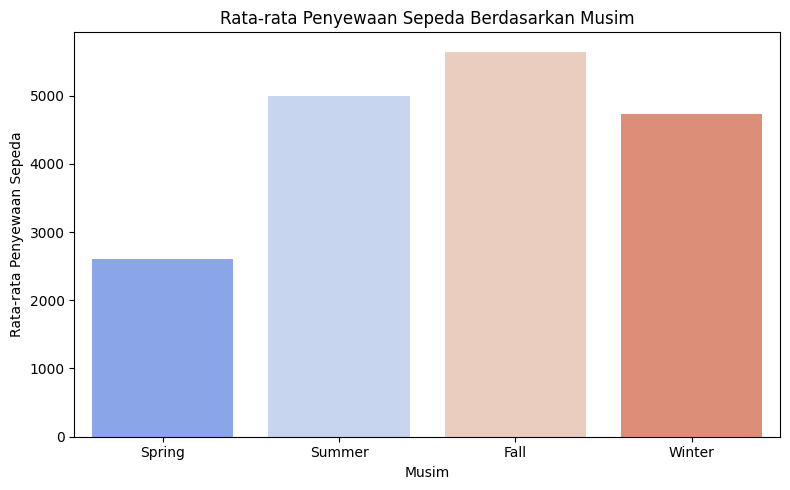

In [294]:
# Bar Plot Rata-rata Penyewaan per Musim
avg_season = merged_daily.groupby('season_name')['cnt'].mean().reindex(['Spring','Summer','Fall','Winter'])
plt.figure(figsize=(8,5))
sns.barplot(x=avg_season.index, y=avg_season.values, palette="coolwarm")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.tight_layout()
plt.show()

<ipython-input-295-daa0238a2d35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season_name', y='cnt', data=merged_daily, palette="coolwarm")


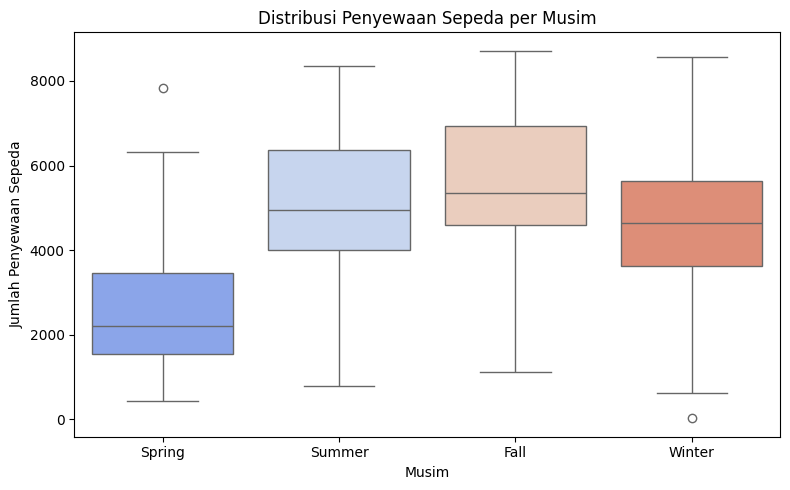

In [295]:
# Boxplot Distribusi Penyewaan per Musim
plt.figure(figsize=(8,5))
sns.boxplot(x='season_name', y='cnt', data=merged_daily, palette="coolwarm")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda per Musim")
plt.tight_layout()
plt.show()

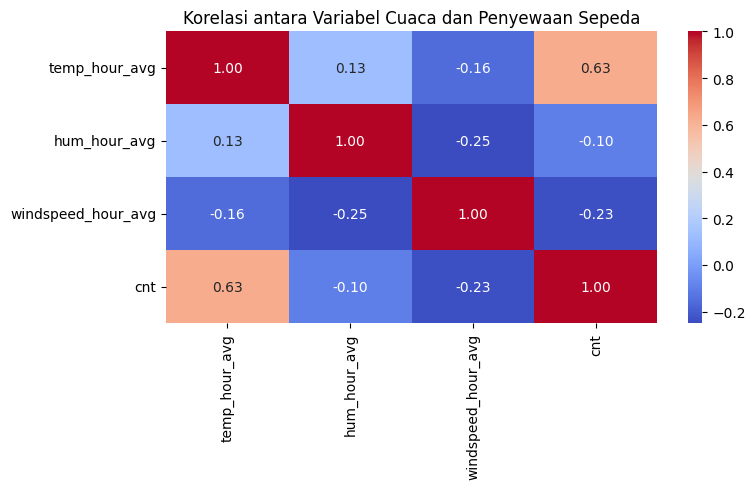

In [296]:
# Heatmap Korelasi Variabel Cuaca dan Penyewaan
plt.figure(figsize=(8,5))
corr_data = merged_daily[['temp_hour_avg', 'hum_hour_avg', 'windspeed_hour_avg', 'cnt']].corr()
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara Variabel Cuaca dan Penyewaan Sepeda")
plt.tight_layout()
plt.show()

**Insight:**
- Bar Plot: Menunjukkan rata-rata penyewaan tertinggi di musim tertentu (Fall) dan terendah di musim lain (Winter).
- Boxplot: Mengungkapkan sebaran penyewaan tiap musim dan apakah terdapat outlier atau variabilitas yang tinggi.
- Heatmap: Menunjukkan seberapa kuat variabel cuaca (suhu, kelembaban, kecepatan angin) berkorelasi dengan jumlah penyewaan, membantu menentukan faktor cuaca yang mempengaruhi.

### Pertanyaan 2:

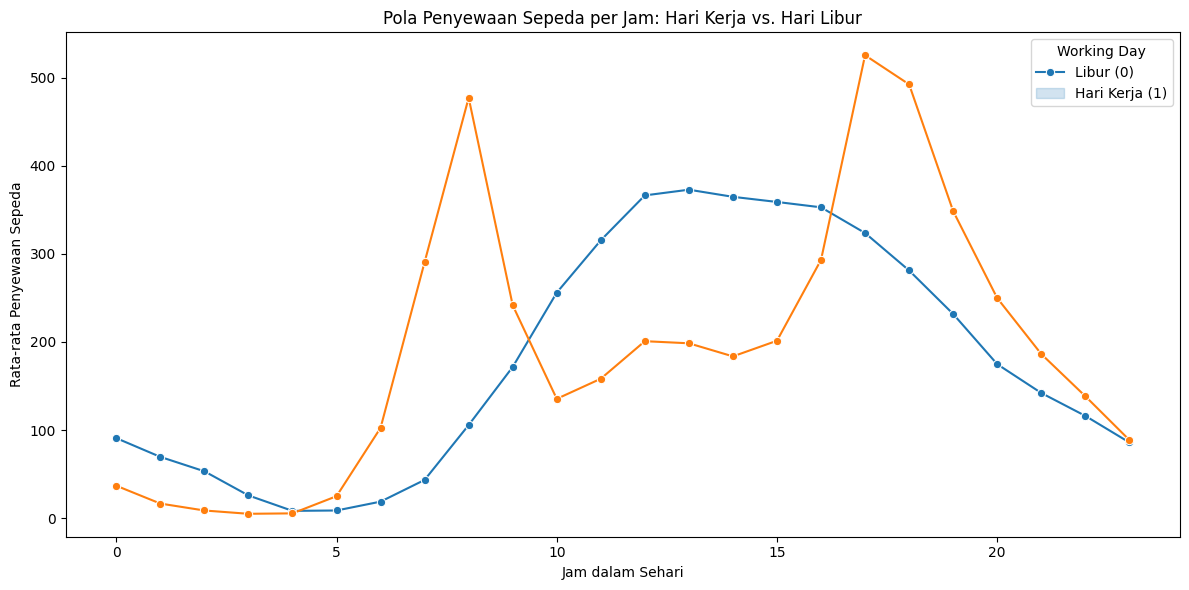

In [297]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=avg_by_hour_working, marker='o')
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda per Jam: Hari Kerja vs. Hari Libur")
plt.legend(title='Working Day', labels=['Libur (0)', 'Hari Kerja (1)'])
plt.tight_layout()
plt.show()

**Insight:**
- Line Plot: Jika pola hari kerja menunjukkan dua puncak (misalnya, pagi dan sore) sedangkan hari libur memiliki pola yang lebih datar atau puncak yang bergeser, ini bisa dijadikan dasar untuk strategi operasional (misalnya, penambahan Karyawan di jam sibuk hari kerja).
- Analisis ini membantu menentukan kapan perbedaan antara hari kerja dan libur paling signifikan, sehingga bisa dioptimalkan kebijakan penjadwalan atau promosi.

## Analisis Lanjutan (Opsional)

## Conclusion

### Kesimpulan Umum

- **Pengaruh Musim dan Cuaca:**  
  Kondisi cuaca, terutama suhu, dan musim memiliki dampak yang signifikan terhadap penyewaan sepeda. Musim Summer yang hangat meningkatkan penyewaan, sedangkan musim Winter menunjukkan penurunan.
  
- **Pola Penyewaan Hari Kerja vs. Hari Libur:**  
  Terdapat perbedaan yang jelas dalam pola penyewaan antara hari kerja dan hari libur. Strategi operasional dan pemasaran harus disesuaikan berdasarkan pola ini untuk mengoptimalkan penggunaan unit.

- **Implementasi Strategi:**  
  Rekomendasi yang diberikan dapat membantu perusahaan dalam:
  - **Mengoptimalkan alokasi Unit:** Menyesuaikan jumlah sepeda dengan permintaan berdasarkan waktu dan musim.
  - **Meningkatkan efisiensi operasional:** Melakukan pemeliharaan pada waktu yang tepat dan mengoptimalkan jadwal layanan.
  - **Mengembangkan strategi pemasaran:** Menyusun promosi musiman dan tersegmentasi untuk menarik lebih banyak pengguna.

Dengan penerapan rekomendasi ini, diharapkan layanan penyewaan sepeda dapat berjalan lebih efisien dan meningkatkan kepuasan pelanggan.

```
```
#### Insight Pertanyaan 1: Pengaruh Cuaca dan Musim terhadap Penyewaan Sepeda

- **Observasi:**
  - Data menunjukkan bahwa penyewaan sepeda cenderung **lebih tinggi pada musim Fall** dan **menurun secara signifikan pada musim Winter**.
  - Terdapat korelasi positif antara **suhu (temp)** dan jumlah penyewaan, yang mengindikasikan bahwa cuaca hangat meningkatkan permintaan.
  - Variabel cuaca lain (seperti kelembaban dan kecepatan angin) juga berkontribusi, meskipun pengaruh utamanya tidak sebesar suhu.

- **Rekomendasi:**
  1. **Penambahan Unit Tiap Musiman:**  
     Tingkatkan ketersediaan sepeda selama musim Summer untuk mengakomodasi permintaan tinggi.
  2. **Promosi dan Diskon Musiman:**  
     Terapkan strategi promosi atau diskon khusus pada musim Winter untuk menarik lebih banyak penyewa, terutama dari segmen pengguna casual.
  3. **Optimasi Prediksi Permintaan:**  
     Manfaatkan model prediktif berbasis kondisi cuaca untuk mengatur alokasi Unit secara dinamis.


#### Insight Pertanyaan 2: Perbedaan Pola Penyewaan antara Hari Kerja dan Hari Libur

- **Observasi:**
  - **Hari Kerja:**  
    Terdapat dua puncak penyewaan yang jelas (pagi dan sore) yang mengindikasikan aktivitas commuter. Ini menunjukkan bahwa penyewaan di hari kerja sangat dipengaruhi oleh kebutuhan mobilitas harian.
  - **Hari Libur:**  
    Pola penyewaan cenderung lebih merata dan tidak menunjukkan puncak tajam, yang mengindikasikan bahwa pengguna mungkin menyewa sepeda untuk rekreasi sepanjang hari.

- **Rekomendasi:**
  1. **Pengaturan Unit Berdasarkan Pola Harian:**  
     Pastikan ketersediaan sepeda ditingkatkan pada jam-jam puncak di hari kerja (misalnya, pada pagi dan sore hari) untuk mengakomodasi aktivitas.
  2. **Strategi Pemasaran Tersegmentasi:**  
     Sesuaikan promosi untuk mendorong penyewaan di luar jam puncak dan pada hari libur, sehingga distribusi penyewaan bisa lebih optimal.
  3. **Penjadwalan Pemeliharaan:**  
     Jadwalkan pemeliharaan sepeda pada jam-jam dengan permintaan rendah agar tidak mengganggu layanan saat jam sibuk.

---